# Naive Bayes: Document Classification

BUSMGT 7247

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer,
                                             TfidfVectorizer)
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, plot_confusion_matrix

# Options for plots
%matplotlib inline
mpl.rc('axes', labelsize=18)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('figure', figsize=(12, 12))

# Seed the random number generator for reproducible results
random_state = 1
np.random.seed(random_state)

## Load 20 Newsgroups Data

In [2]:
# Load newsgroup data
# The data includes 20 newsgroups. Take a subset for processing speed
categories = sorted([
    'comp.graphics', 'comp.sys.mac.hardware',
    'misc.forsale',
    'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey',
    'sci.med', 'sci.space',
    'talk.politics.misc'
])

X_train_raw, y_train \
    = fetch_20newsgroups(subset='train', categories=categories,
                         random_state=random_state, return_X_y=True)

X_test_raw, y_test \
    = fetch_20newsgroups(subset='test', categories=categories,
                         random_state=random_state, return_X_y=True)

In [3]:
len(X_train_raw)

5194

In [4]:
print(y_train[0])
print(categories[y_train[0]])

6
sci.med


In [5]:
print(X_train_raw[0])

From: dmp@fig.citib.com (Donna M. Paino)
Subject: Psoriatic Arthritis - Info Needed Please!
Originator: dmp@eagle
Organization: Citibank IBISM
Lines: 34



A friend of mine has been diagnosed with Psoriatic Arthritis, as a result of
trauma sustained in a car accident several years ago.  The psoriasis is under
control but the arthritis part of the illness is not.

Ansaid (non-steroidal anti-inflammatory) worked pretty well for three years but
isn't helping much now.  My friend is now taking Meclomen (another NSAID) but
this isn't helping control the pain at all.  In the past two months my friend
has also started taking Azulfadine along with the NSAID medicines, but the
effects of the combined drugs aren't supposed to be realized for several months.

As a result of the pain, my friend is having problems sleeping.  Staying in
one position too long is an ordeal.  Another major contributor to pain is that
tendonitis has now developed (left thumb and hand with numbness at the base of
the pal

In [6]:
print(y_train[10])
print(categories[y_train[10]])

0
comp.graphics


In [7]:
print(X_train_raw[10])

From: omar@godzilla.osf.org (Mark Marino)
Subject: WANTED: Playmation Info
Organization: Open Software Foundation
Lines: 21

Hi Folks,

   Does anyone have a copy of Playmation they'd be willing to sell me.  I'd 
love to try it out, but not for the retail $$$.  If you have moved onto 
something bigger (3DS) or better (Imagine), I'd love to buy your table scraps.

   If noone is selling, can anyone recommend a place to buy Playmation 
mail-order for cheap?  

   Thanks in advance,

   Mark



-- 
 ----------------------------------------------------------------------------- 
|                                                                             |
| Mark Marino              | omar@osf.org           |  uunet!osf!omar         |
| Open Software Foundation | 11 Cambridge Center    |  Cambridge, MA 02142    |
|_____________________________________________________________________________|



## Create Features Using a Bag of Words Model

In [8]:
countvect = CountVectorizer()
X_train_count = countvect.fit_transform(X_train_raw)
X_test_count = countvect.transform(X_test_raw)

In [9]:
X_train_count.shape

(5194, 58526)

In [10]:
# The vocabulary dictionary records the index of each word's feature
# Print 10 example entries
for idx, (k, v) in enumerate(countvect.vocabulary_.items()):
    if idx == 10: break
    print((k, v))    

('from', 25571)
('dmp', 21221)
('fig', 24615)
('citib', 16556)
('com', 17181)
('donna', 21382)
('paino', 40718)
('subject', 51168)
('psoriatic', 43676)
('arthritis', 11071)


In [11]:
# Find the location of these example words
example_words = ['me', 'the', 'and', 'space', 'mars', 'pete', 'rose',
                 'circuit', 'capacitor', 'processor', 'current',
                 'flame', 'idiot', 'arse']

for word in example_words:
    print(f'{word + ":":14}{countvect.vocabulary_[word]}')

me:           36019
the:          52769
and:          10285
space:        49791
mars:         35552
pete:         41636
rose:         46594
circuit:      16504
capacitor:    15233
processor:    43330
current:      18989
flame:        24848
idiot:        29505
arse:         11054


## Fit Naive Bayes Model to Word Counts

In [12]:
nbclf = MultinomialNB()
nbclf.fit(X_train_count, y_train)

MultinomialNB()

In [13]:
# Get performance on training data
print(classification_report(y_train, nbclf.predict(X_train_count),
                            target_names=categories))

                       precision    recall  f1-score   support

        comp.graphics       0.99      0.98      0.98       584
comp.sys.mac.hardware       0.98      0.99      0.99       578
         misc.forsale       0.98      0.95      0.96       585
      rec.motorcycles       0.99      0.99      0.99       598
   rec.sport.baseball       0.99      0.99      0.99       597
     rec.sport.hockey       0.99      0.99      0.99       600
              sci.med       0.99      0.99      0.99       594
            sci.space       0.99      1.00      0.99       593
   talk.politics.misc       0.97      0.98      0.98       465

             accuracy                           0.99      5194
            macro avg       0.99      0.99      0.99      5194
         weighted avg       0.99      0.99      0.99      5194



In [14]:
# Get performance on test data
print(classification_report(y_test, nbclf.predict(X_test_count),
                            target_names=categories))

                       precision    recall  f1-score   support

        comp.graphics       0.89      0.88      0.89       389
comp.sys.mac.hardware       0.87      0.90      0.89       385
         misc.forsale       0.94      0.84      0.89       390
      rec.motorcycles       0.94      0.97      0.96       398
   rec.sport.baseball       0.96      0.92      0.94       397
     rec.sport.hockey       0.95      0.97      0.96       399
              sci.med       0.94      0.88      0.91       396
            sci.space       0.92      0.92      0.92       394
   talk.politics.misc       0.79      0.92      0.85       310

             accuracy                           0.91      3458
            macro avg       0.91      0.91      0.91      3458
         weighted avg       0.91      0.91      0.91      3458



## Create Features Using TFIDF

In [15]:
tfidf = TfidfTransformer(sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train_count)
X_test_tfidf = tfidf.transform(X_test_count)

In [16]:
print(X_train_tfidf[0])

  (0, 58229)	0.019287768719228455
  (0, 58169)	0.04594157348293114
  (0, 58138)	0.06317909376864346
  (0, 58135)	0.03568838211286805
  (0, 57653)	0.024972197493817093
  (0, 57591)	0.05930581104048054
  (0, 57576)	0.054852000970564085
  (0, 57409)	0.04087405232268578
  (0, 57253)	0.02582611352744685
  (0, 57157)	0.02837476802177446
  (0, 56943)	0.032339190124601916
  (0, 54762)	0.045130733404283335
  (0, 54326)	0.03381676930365297
  (0, 54313)	0.08004186842442218
  (0, 53868)	0.07251040595481816
  (0, 53867)	0.05859117504607184
  (0, 53832)	0.09060701052083063
  (0, 53451)	0.03479391882259832
  (0, 53335)	0.03538145590648953
  (0, 53055)	0.07498277324262885
  (0, 52992)	0.0447270667514861
  (0, 52924)	0.031774985597274784
  (0, 52889)	0.09727037018440685
  (0, 52769)	0.051004693901110884
  (0, 52762)	0.03564750444094615
  :	:
  (0, 12176)	0.05334678709712213
  (0, 11764)	0.10552369159426973
  (0, 11707)	0.0631900702532717
  (0, 11351)	0.03668339662697836
  (0, 11109)	0.03870111390834398

## Fit Naive Bayes Model to TFIDF

In [17]:
nbclf = MultinomialNB()
nbclf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [18]:
# Get performance on training data
print(classification_report(y_train, nbclf.predict(X_train_tfidf),
                            target_names=categories))

                       precision    recall  f1-score   support

        comp.graphics       0.99      0.97      0.98       584
comp.sys.mac.hardware       0.97      0.99      0.98       578
         misc.forsale       0.99      0.94      0.96       585
      rec.motorcycles       0.99      0.99      0.99       598
   rec.sport.baseball       0.99      0.99      0.99       597
     rec.sport.hockey       0.98      0.99      0.99       600
              sci.med       0.98      0.99      0.98       594
            sci.space       0.98      1.00      0.99       593
   talk.politics.misc       1.00      0.98      0.99       465

             accuracy                           0.98      5194
            macro avg       0.98      0.98      0.98      5194
         weighted avg       0.98      0.98      0.98      5194



In [19]:
# Get performance on test data
print(classification_report(y_test, nbclf.predict(X_test_tfidf),
                            target_names=categories))

                       precision    recall  f1-score   support

        comp.graphics       0.93      0.84      0.89       389
comp.sys.mac.hardware       0.86      0.92      0.89       385
         misc.forsale       0.97      0.83      0.89       390
      rec.motorcycles       0.93      0.98      0.96       398
   rec.sport.baseball       0.93      0.94      0.93       397
     rec.sport.hockey       0.90      0.99      0.94       399
              sci.med       0.92      0.92      0.92       396
            sci.space       0.87      0.96      0.91       394
   talk.politics.misc       0.97      0.83      0.90       310

             accuracy                           0.92      3458
            macro avg       0.92      0.91      0.91      3458
         weighted avg       0.92      0.92      0.92      3458



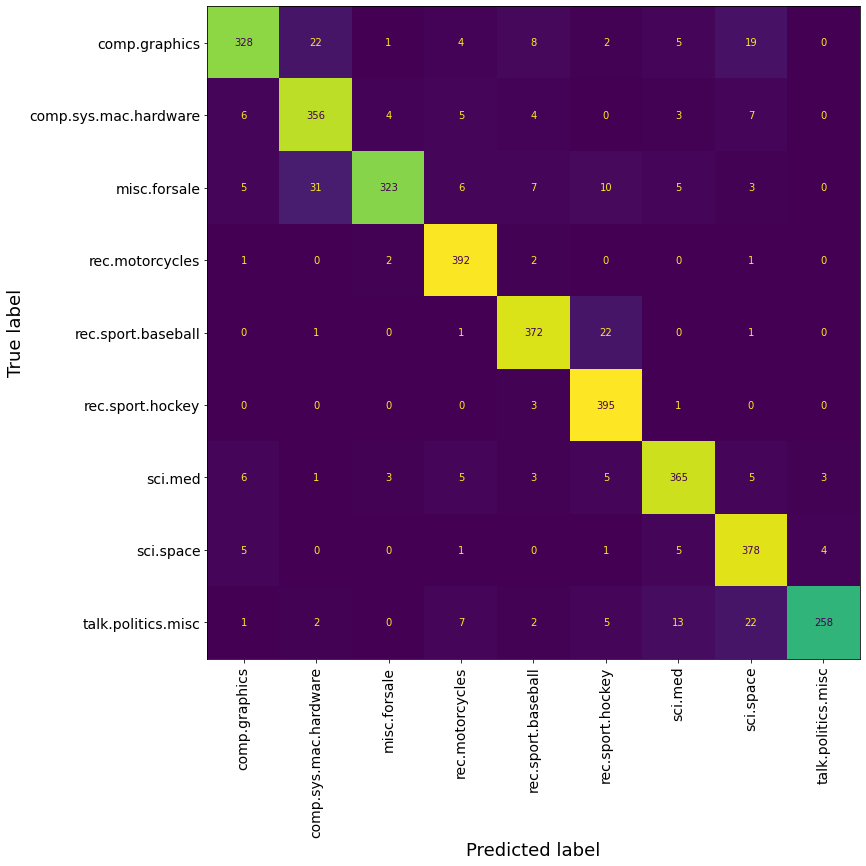

In [20]:
plot_confusion_matrix(nbclf, X_test_tfidf, y_test, display_labels=categories,
                      cmap='viridis', colorbar=False)
plt.xticks(rotation=90)
plt.show()

## Use a Pipeline

In [21]:
clf = Pipeline([
    ('tfidf', TfidfVectorizer(sublinear_tf=True)),
    ('nbclf', MultinomialNB()),
])

In [22]:
clf.fit(X_train_raw, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(sublinear_tf=True)),
                ('nbclf', MultinomialNB())])

In [23]:
# Get performance on training data
print(classification_report(y_train, clf.predict(X_train_raw),
                            target_names=categories))

                       precision    recall  f1-score   support

        comp.graphics       0.99      0.97      0.98       584
comp.sys.mac.hardware       0.97      0.99      0.98       578
         misc.forsale       0.99      0.94      0.96       585
      rec.motorcycles       0.99      0.99      0.99       598
   rec.sport.baseball       0.99      0.99      0.99       597
     rec.sport.hockey       0.98      0.99      0.99       600
              sci.med       0.98      0.99      0.98       594
            sci.space       0.98      1.00      0.99       593
   talk.politics.misc       1.00      0.98      0.99       465

             accuracy                           0.98      5194
            macro avg       0.98      0.98      0.98      5194
         weighted avg       0.98      0.98      0.98      5194



In [24]:
# Get performance on test data
print(classification_report(y_test, clf.predict(X_test_raw),
                            target_names=categories))

                       precision    recall  f1-score   support

        comp.graphics       0.93      0.84      0.89       389
comp.sys.mac.hardware       0.86      0.92      0.89       385
         misc.forsale       0.97      0.83      0.89       390
      rec.motorcycles       0.93      0.98      0.96       398
   rec.sport.baseball       0.93      0.94      0.93       397
     rec.sport.hockey       0.90      0.99      0.94       399
              sci.med       0.92      0.92      0.92       396
            sci.space       0.87      0.96      0.91       394
   talk.politics.misc       0.97      0.83      0.90       310

             accuracy                           0.92      3458
            macro avg       0.92      0.91      0.91      3458
         weighted avg       0.92      0.92      0.92      3458

